<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/Lab_pycaret_Automobile_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [1]:
# Principales librerías

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Cargar Data

import pandas as pd
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days','Default']))


In [4]:
features_string = list(pddf.select_dtypes(include=['object']).columns)


In [5]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [6]:
numeric_features = list(set(features) - set(categorical_features))


In [7]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [8]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


# Análisis de datos con Pycaret

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret[full]

In [19]:
from pycaret.utils import version
version()

'2.3.10'

In [9]:
import numpy as np
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [10]:
base_train = pddf.sample(frac = 0.8, random_state=1)
base_train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
65319,12115745,15750.0,1.0,1.0,0.0,1.0,0.0,119558.70,3508.65,Relative,...,Yes,No,Business Entity Type 3,0.848749,0.713068,0.466864,NaN,1573.0,1.0,0
10144,12137144,18000.0,0.0,0.0,1.0,0.0,0.0,45000.00,2441.25,Alone,...,Yes,Yes,Business Entity Type 1,0.621518,0.400694,0.520898,NaN,563.0,1.0,0
44807,12113105,27000.0,0.0,0.0,0.0,1.0,0.0,71064.00,8433.45,Alone,...,No,Yes,Other,NaN,0.648914,0.591977,NaN,648.0,2.0,1
37216,12197210,18000.0,1.0,1.0,0.0,NaN,NaN,112950.00,3302.55,Alone,...,Yes,Yes,Industry: type 9,0.237203,0.656582,0.549597,0.0247,2057.0,0.0,0
57611,12117746,6750.0,0.0,0.0,1.0,1.0,0.0,26368.65,1526.85,Alone,...,Yes,Yes,None,NaN,NaN,NaN,0.1485,370.0,0.0,0


In [11]:
from pycaret.classification import setup
experimento = setup(data = base_train, 
                    target = 'Default', 
                    ignore_features = ['ID', 'ID_Days'], 
                    session_id=123)

,Description,Value
0,session_id,123
1,Target,Default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(97485, 40)"
5,Missing Values,True
6,Numeric Features,14
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['ID', 'ID_Days'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('

# 3. Compare Models

In [12]:
from pycaret.classification import compare_models
modelos = compare_models(sort = 'AUC', fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9190,0.7459,0.0345,0.5946,0.0652,0.0567,0.1290,14.472
rf,Random Forest Classifier,0.9222,0.7452,0.0505,0.9969,0.0960,0.0888,0.2149,8.006
lightgbm,Light Gradient Boosting Machine,0.9183,0.7418,0.0200,0.5243,0.0386,0.0328,0.0904,1.016
gbc,Gradient Boosting Classifier,0.9179,0.7358,0.0152,0.4528,0.0294,0.0243,0.0710,19.590
xgboost,Extreme Gradient Boosting,0.9183,0.7346,0.0512,0.5081,0.0929,0.0792,0.1416,22.906
et,Extra Trees Classifier,0.9238,0.7341,0.0691,1.0000,0.1292,0.1199,0.2525,11.348
ada,Ada Boost Classifier,0.9176,0.7284,0.0227,0.4409,0.0432,0.0354,0.0850,4.396
lda,Linear Discriminant Analysis,0.9178,0.7119,0.0057,0.3878,0.0113,0.0088,0.0385,1.726
nb,Naive Bayes,0.9118,0.6012,0.0113,0.1232,0.0205,0.0058,0.0116,0.168
lr,Logistic Regression,0.9181,0.5922,0.0000,0.0000,0.0000,0.0000,0.0000,1.868


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f7da4649a10>
INFO:logs:compare_models() succesfully completed......................................


# 4. Create Model

In [13]:
from pycaret.classification import create_model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9193,0.7505,0.0429,0.6000,0.0801,0.0700,0.1451
1,0.9203,0.7614,0.0340,0.8261,0.0653,0.0592,0.1578
2,0.9184,0.7497,0.0340,0.5278,0.0639,0.0545,0.1184
3,0.9172,0.7238,0.0233,0.4062,0.0440,0.0354,0.0812
4,0.9191,0.7441,0.0358,0.6061,0.0676,0.0590,0.1332
5,0.9207,0.7317,0.0465,0.7647,0.0877,0.0790,0.1762
6,0.9194,0.7561,0.0447,0.6098,0.0833,0.0730,0.1496
7,0.9190,0.7712,0.0483,0.5625,0.0890,0.0770,0.1475
8,0.9204,0.7789,0.0448,0.7143,0.0843,0.0754,0.1657


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f7de42dc190>
INFO:logs:create_model() succesfully completed......................................


# 5. Tune Model

In [21]:
from pycaret.classification import tune_model
tuned_catboost = tune_model(catboost, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9176,0.7426,0.0143,0.4211,0.0277,0.0224,0.0653
1,0.9182,0.7565,0.0072,0.5714,0.0141,0.0121,0.0572
2,0.9178,0.7341,0.0143,0.4444,0.0277,0.0227,0.0680
3,0.9174,0.7102,0.0089,0.3333,0.0174,0.0132,0.0430
4,0.9181,0.7294,0.0125,0.5000,0.0244,0.0205,0.0691
5,0.9187,0.7280,0.0197,0.6111,0.0381,0.0332,0.0992
6,0.9187,0.7491,0.0197,0.6111,0.0381,0.0332,0.0992
7,0.9182,0.7555,0.0197,0.5238,0.0379,0.0322,0.0895
8,0.9198,0.7690,0.0233,0.8667,0.0454,0.0413,0.1344


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f7da485c290>
INFO:logs:tune_model() succesfully completed......................................


In [22]:
print(tuned_catboost)

# 8. Analyze Model

In [23]:
from pycaret.classification import plot_model

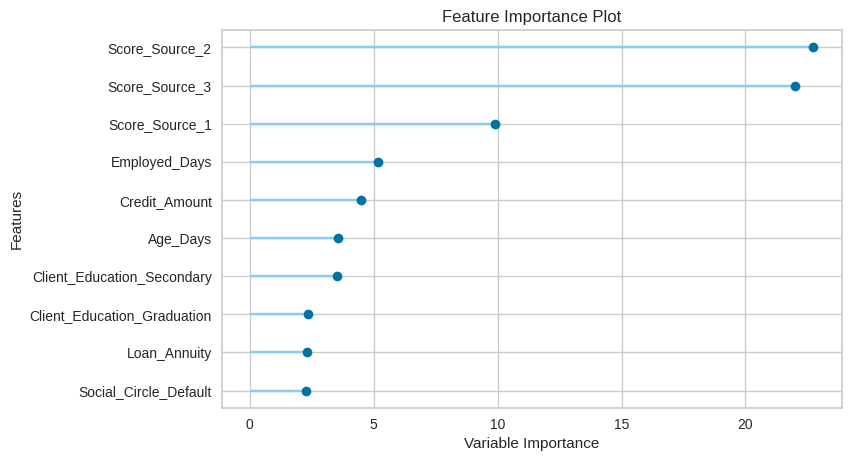

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_catboost, plot='feature')

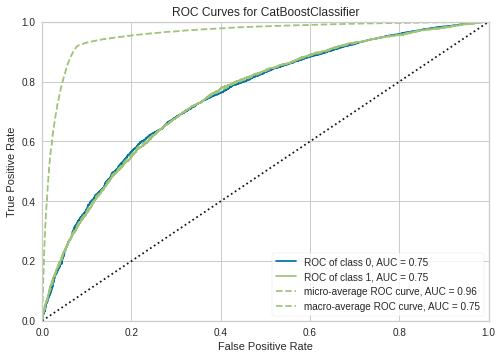

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_catboost)

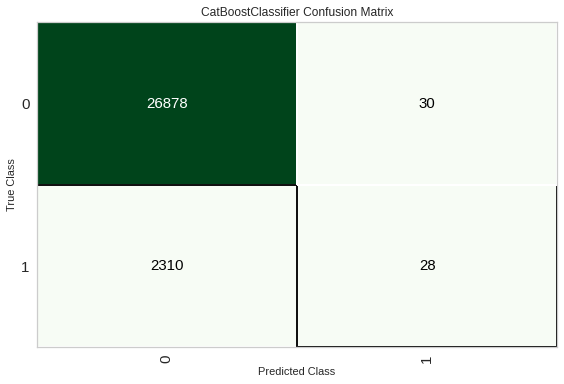

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

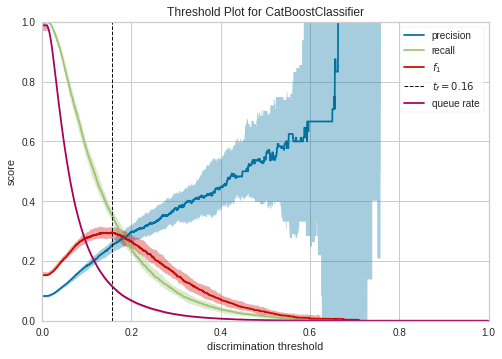

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_catboost, plot = 'threshold')

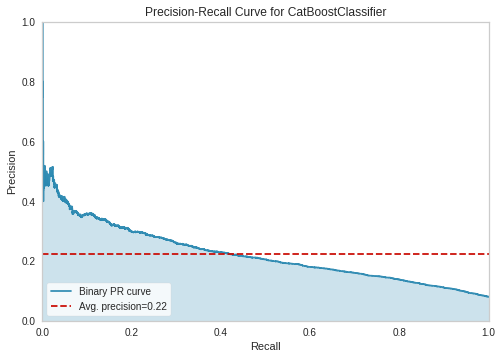

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(tuned_catboost, plot = 'pr')

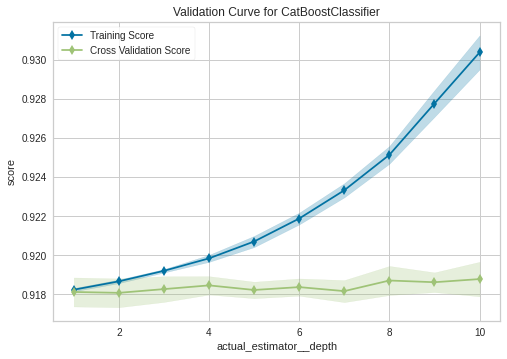

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(tuned_catboost, plot = 'vc')

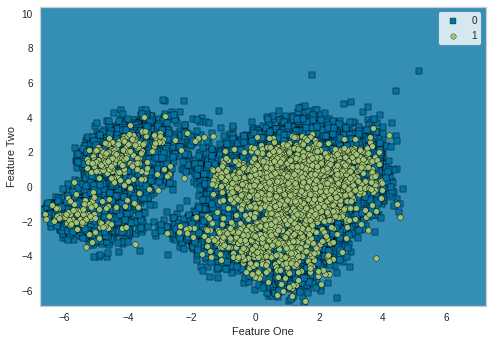

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(tuned_catboost, plot = 'boundary')

In [35]:
from pycaret.classification import evaluate_model
evaluate_model(tuned_catboost)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f7da485c290>, fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 9. Interpret Model

In [ ]:
from pycaret.classification import interpret_model
interpret_model(catboost)

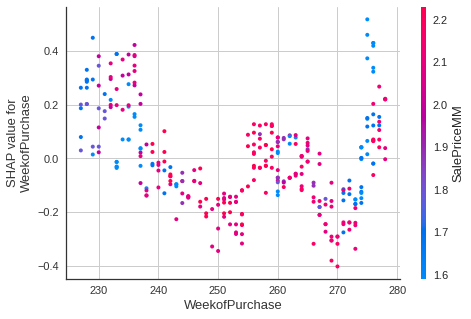

In [ ]:
interpret_model(xgboost, plot = 'correlation')

In [ ]:
interpret_model(xgboost, plot = 'reason', observation=1)

In [ ]:
interpret_model(xgboost, plot = 'reason')